## Streamflow Analysis and Visualizations

### 1. Load the Streamflow Data

In [1]:
# Import necessary modules and the postprocessing library

import sys
import pandas as pd
sys.path.append("../../../")
import glob
from natsort import natsorted


from postprocessinglib.evaluation import data, metrics, visuals
from postprocessinglib.utilities import _helper_functions as hlp

In [2]:
# Define the input path and organize them

folder = r'C:\Users\udenzeU\OneDrive - EC-EC\Fuad_Mesh_Dataset\CanRCM_runs' ## new line
start_dates = [pd.to_datetime('1990-01-01'), pd.to_datetime('2026-01-01'), pd.to_datetime('2071-01-01')]
end_dates = [pd.to_datetime('2010-12-31'), pd.to_datetime('2055-12-31'), pd.to_datetime('2100-12-31')]

# Extract list of CSV files
csv_files = glob.glob(f"{folder}/**/MESH_output_streamflow.csv")
csv_files = natsorted(csv_files)

In [3]:
# Load the Streamflow data using the `generate_dataframes` function 

DATAFRAMES = data.generate_dataframes(csv_fpaths=csv_files)
for key, value in DATAFRAMES.items():
    print(f"{key}")
for key, value in DATAFRAMES.items():
    print(f"{key}:\n{value.head()}")

The start date for the Data is 1990-10-01
DF_1
DF_2
DF_3
DF_4
DF_5
DF_6
DF_OBSERVED
DF_SIMULATED_1
DF_SIMULATED_2
DF_SIMULATED_3
DF_SIMULATED_4
DF_SIMULATED_5
DF_SIMULATED_6
DF_MERGED
DF_1:
            QOMEAS1    QOSIM1  QOMEAS2    QOSIM2  QOMEAS3    QOSIM3  QOMEAS4  \
1990-10-01     10.6  18.81220      NaN  2.017267    0.593  0.471522     7.70   
1990-10-02     10.8  18.51336      NaN  1.686926    0.777  0.466355     8.11   
1990-10-03     11.1  18.35229      NaN  1.599513    0.697  0.426448     7.74   
1990-10-04     11.0  18.30125      NaN  1.680425    0.668  0.385862     7.43   
1990-10-05     26.8  18.06379      NaN  1.764025    0.627  0.335419     8.07   

              QOSIM4  QOMEAS5    QOSIM5  ...  QOMEAS50   QOSIM50  QOMEAS51  \
1990-10-01  39.71715     2.89  5.233493  ...       NaN  0.067004     0.129   
1990-10-02  36.69350     2.93  4.991893  ...       NaN  0.073589     0.150   
1990-10-03  34.88419     2.70  4.767472  ...       NaN  0.079277     0.197   
1990-10-04  34.04

### 2. Process and Aggregate the Data

In [4]:
merged = DATAFRAMES["DF_MERGED"]
print(merged.head(10)) # Let's see what is looks like

# Use the long term seasonal aggregation to aggregate the data by time period into a single year time period

lt_mean_1990_2010 = data.long_term_seasonal(merged.loc[start_dates[0]: end_dates[0]], 'mean')
print(lt_mean_1990_2010)

lt_mean_2026_2055 = data.long_term_seasonal(merged.loc[start_dates[1]: end_dates[1]], 'mean')
print(lt_mean_2026_2055)

lt_mean_2071_2100 = data.long_term_seasonal(merged.loc[start_dates[2]: end_dates[2]], 'mean')
print(lt_mean_2071_2100)

           Station1                                                    \
             QOMEAS    QOSIM1    QOSIM2    QOSIM3    QOSIM4    QOSIM5   
1990-10-01     10.6  18.81220  18.82299  18.81733  18.81468  18.81892   
1990-10-02     10.8  18.51336  18.72746  18.51571  18.63782  18.67601   
1990-10-03     11.1  18.35229  18.70900  18.28233  18.49831  18.67621   
1990-10-04     11.0  18.30125  18.75058  18.00542  18.10607  18.62771   
1990-10-05     26.8  18.06379  18.57560  17.74772  17.75610  18.33330   
1990-10-06     32.3  17.88546  18.19083  17.55242  17.61585  18.02880   
1990-10-07     22.2  17.70854  17.74622  17.48413  17.53787  17.93426   
1990-10-08     19.1  17.61584  17.50106  17.49782  17.37719  17.75793   
1990-10-09     18.0  17.60339  17.38908  17.56804  17.27410  17.53244   
1990-10-10     18.7  17.58252  17.30749  17.56341  17.18378  17.33812   

                     Station2                      ... Station53            \
              QOSIM6   QOMEAS    QOSIM1    QO

       Station1                                                         \
         QOMEAS     QOSIM1     QOSIM2     QOSIM3     QOSIM4     QOSIM5   
jday                                                                     
1      9.497436  11.581862  10.354240   9.274994  12.612843  11.710418   
2      9.467179  11.296332  10.332833   9.328039  12.760337  11.282132   
3      9.518974  11.058306  10.452156   9.151275  12.247396  10.917497   
4      9.554872  11.146149  10.342944   9.065909  11.804737  10.587664   
5      9.501026  11.100729  10.447961   8.979059  11.923177  10.362997   
...         ...        ...        ...        ...        ...        ...   
362   10.680750  12.756324  11.683511   9.688269  12.870923  11.329784   
363   10.861500  12.530487  11.239175   9.806731  12.567685  11.026859   
364   10.468750  12.353217  10.676666   9.538857  12.259529  10.966772   
365   10.152250  12.044333  10.442994   9.391621  12.291368  11.508266   
366   10.871000  10.502868  11.166293 

In [5]:
# Use the statistics aggregation to aggregate the multiple model simulations into maximum, median and minimum values per time period per station

min_1990_2010     = data.stat_aggregate(lt_mean_1990_2010, 'min')
max_1990_2010     = data.stat_aggregate(lt_mean_1990_2010, 'max')
median_1990_2010  = data.stat_aggregate(lt_mean_1990_2010, 'median')
# Let's see what this looks like
print(min_1990_2010)
print(max_1990_2010)
print(median_1990_2010)

# We do the same thing for the other time periods
min_2026_2055     = data.stat_aggregate(lt_mean_2026_2055, 'min')
max_2026_2055     = data.stat_aggregate(lt_mean_2026_2055, 'max')
median_2026_2055  = data.stat_aggregate(lt_mean_2026_2055, 'median')

min_2071_2100     = data.stat_aggregate(lt_mean_2071_2100, 'min')
max_2071_2100     = data.stat_aggregate(lt_mean_2071_2100, 'max')
median_2071_2100  = data.stat_aggregate(lt_mean_2071_2100, 'median')

      Station1  Station2  Station3   Station4  Station5   Station6  Station7  \
           MIN       MIN       MIN        MIN       MIN        MIN       MIN   
jday                                                                           
1     6.329358  0.433963  0.005967  13.416614  2.642453  13.954072  0.000863   
2     6.272638  0.430830  0.005810  13.317578  2.630690  13.851633  0.000828   
3     6.214155  0.427641  0.005658  13.215868  2.617990  13.745751  0.000795   
4     6.157008  0.424554  0.005513  13.112881  2.605905  13.629465  0.000764   
5     6.098863  0.421523  0.005376  13.033418  2.588094  13.516563  0.000932   
...        ...       ...       ...        ...       ...        ...       ...   
362   6.559302  0.448137  0.006684  13.820552  2.752976  14.424254  0.001061   
363   6.503955  0.444373  0.006527  13.670305  2.704638  14.293511  0.001014   
364   6.445303  0.440619  0.006405  13.547787  2.660635  14.175765  0.000970   
365   6.396284  0.437201  0.006232  13.5

### 3. Visualize the Streamflow data

In [6]:
# Extract the stations you want to plot 
stations = ["Station6", "Station20", "Station27", "Station33", "Station46"]

# Because we have 3 time periods, let us write the lines and bounds into lists so its easier to follow
lines_to_plot = [median_1990_2010.loc[:, median_1990_2010.columns.map(lambda x: x[0] in stations and x[1] == "MEDIAN")],
                 median_2026_2055.loc[:, median_1990_2010.columns.map(lambda x: x[0] in stations and x[1] == "MEDIAN")],
                 median_2071_2100.loc[:, median_1990_2010.columns.map(lambda x: x[0] in stations and x[1] == "MEDIAN")]]

# and now for the bounds
#upper
ubounds_list = [max_1990_2010.loc[:, max_1990_2010.columns.map(lambda x: x[0] in stations and x[1] == "MAX")],
                max_2026_2055.loc[:, max_1990_2010.columns.map(lambda x: x[0] in stations and x[1] == "MAX")],
                max_2071_2100.loc[:, max_1990_2010.columns.map(lambda x: x[0] in stations and x[1] == "MAX")]]
#lower
lbounds_list = [min_1990_2010.loc[:, min_1990_2010.columns.map(lambda x: x[0] in stations and x[1] == "MIN")],
                min_2026_2055.loc[:, min_1990_2010.columns.map(lambda x: x[0] in stations and x[1] == "MIN")],
                min_2071_2100.loc[:, min_1990_2010.columns.map(lambda x: x[0] in stations and x[1] == "MIN")]]

Number of linestyles provided is less than the minimum required. Number of Lines : 3. Number of linestyles provided is:  1. Defaulting to solid lines (-)


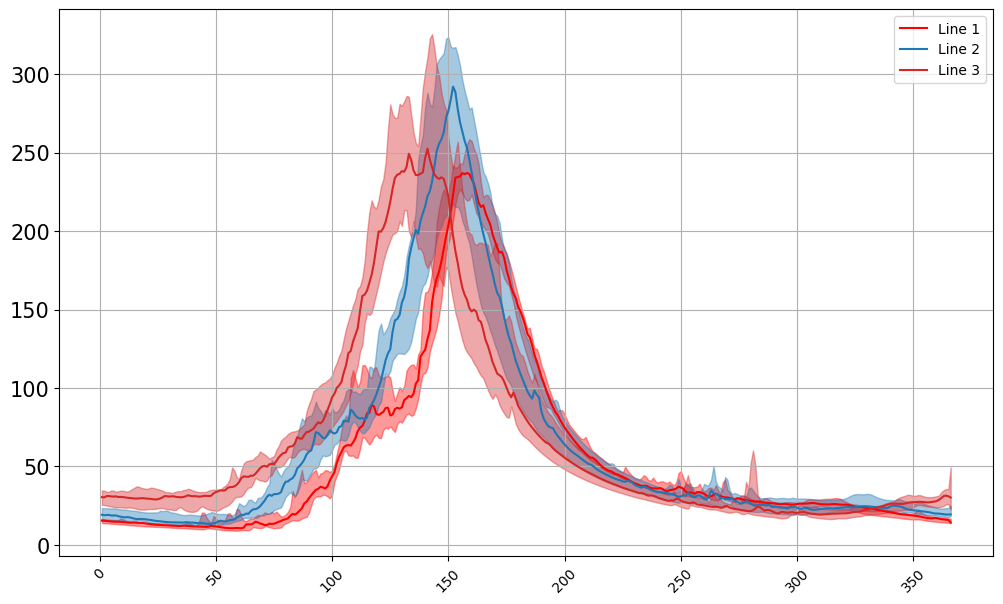

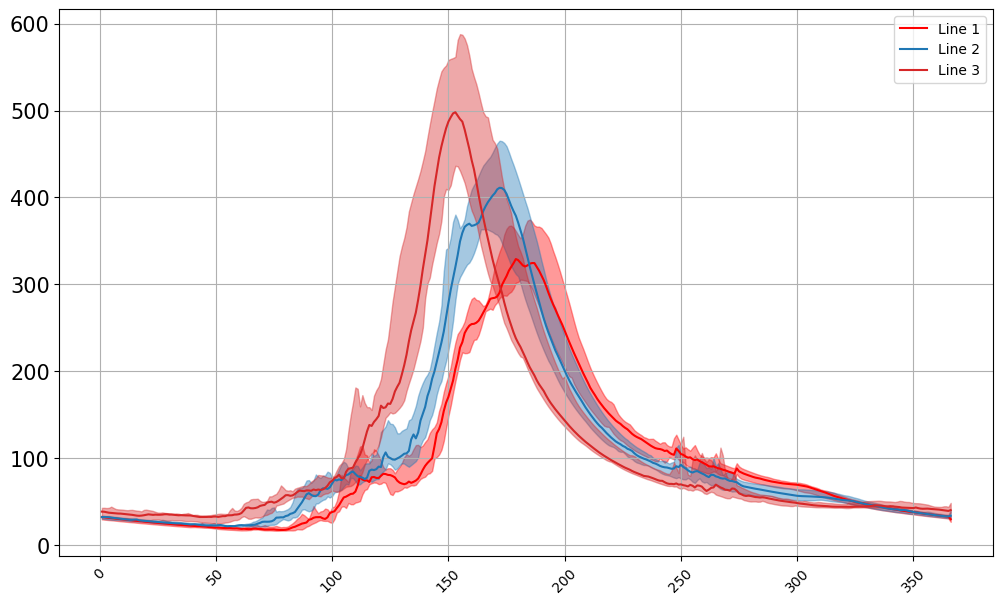

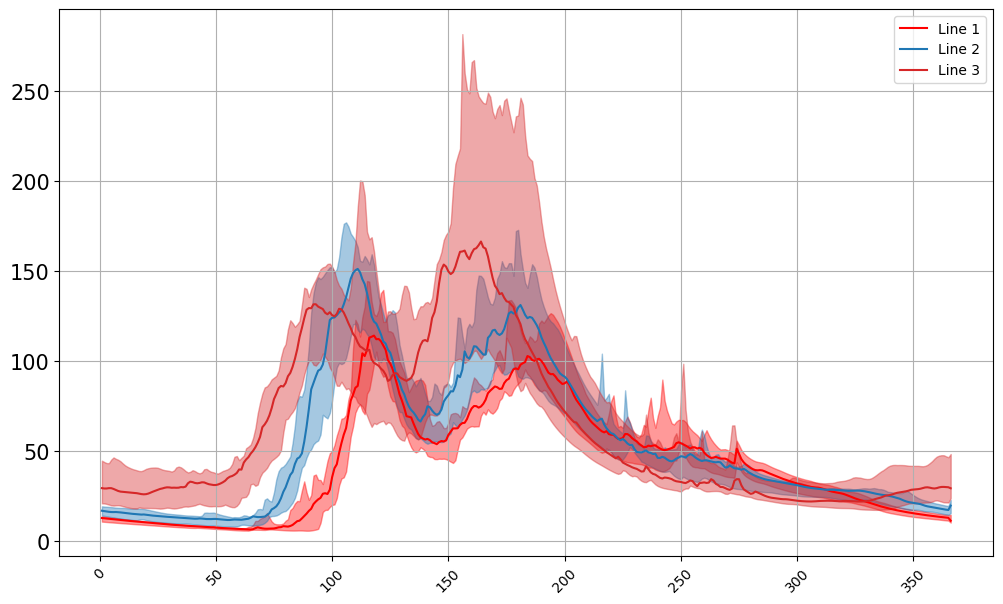

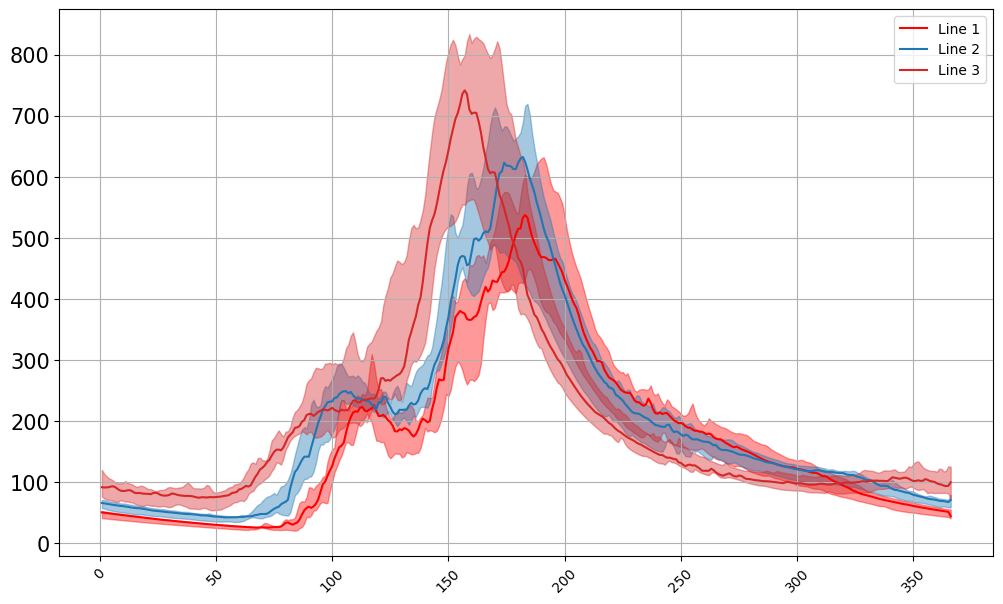

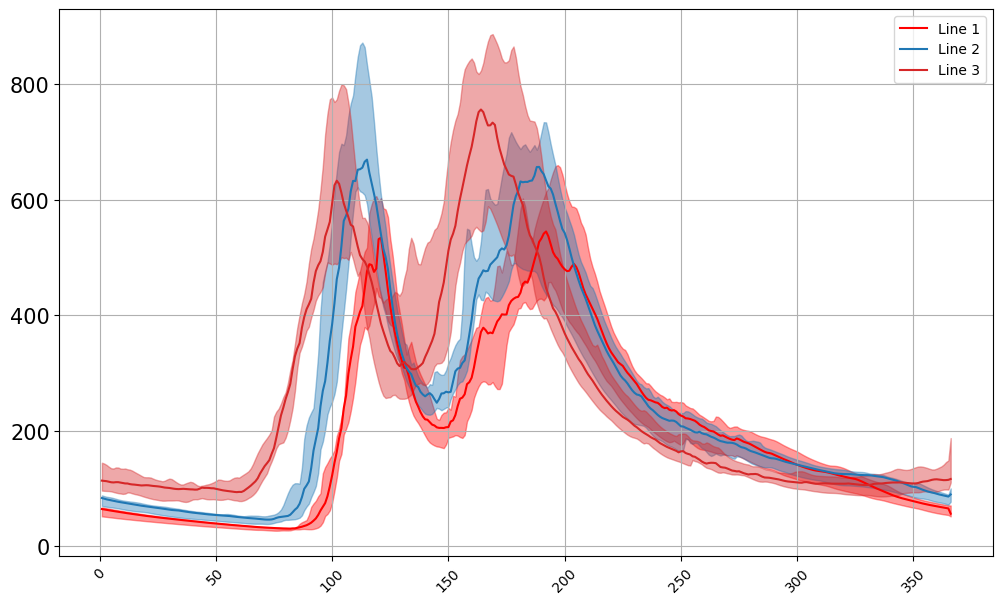

In [7]:
# Now that we have extracted out lines and bounds, let us plot the graps using the bounded plot function
visuals.bounded_plot(
    lines = lines_to_plot, 
    upper_bounds = ubounds_list,
    lower_bounds = lbounds_list,
    grid=True,
)

# The function has a bunch of default colors, transparencies and legends, thus we can infact
# run test visuals without having to specify all the details 

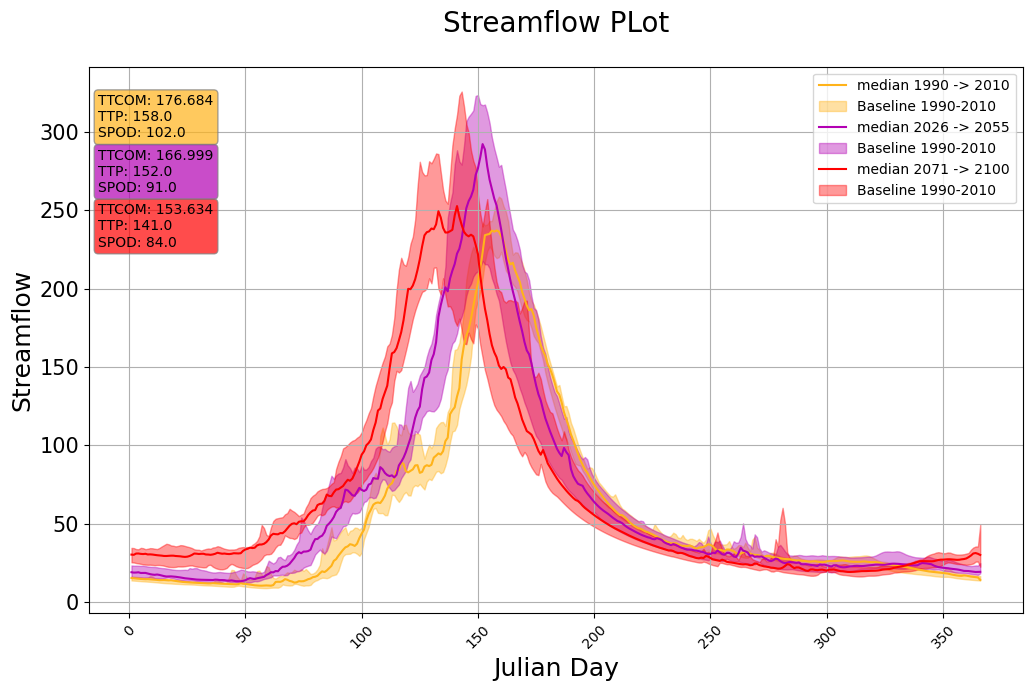

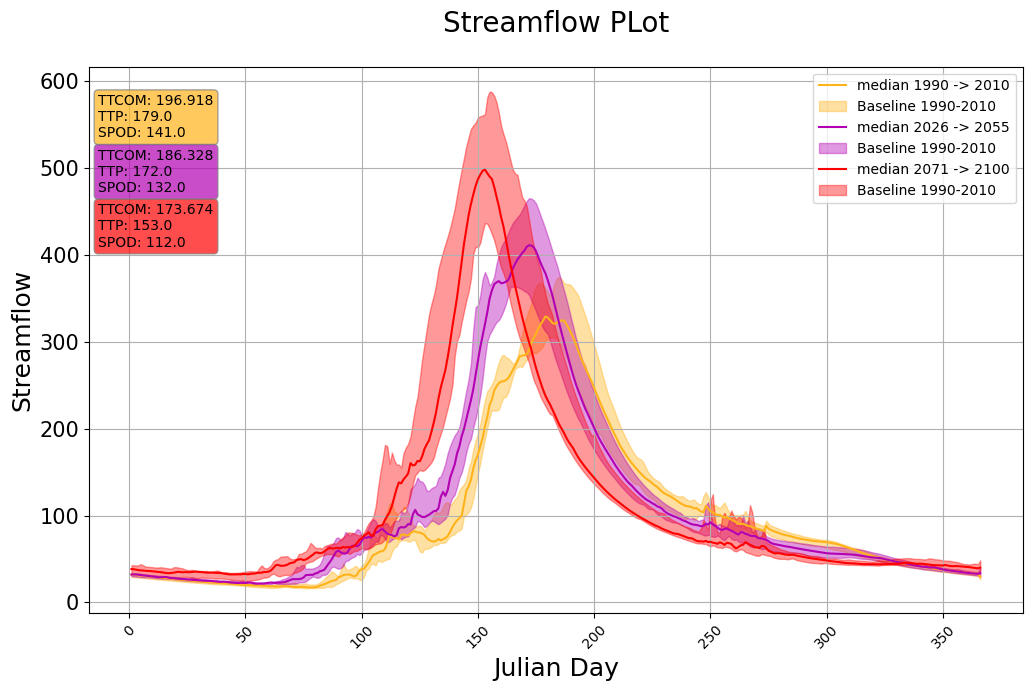

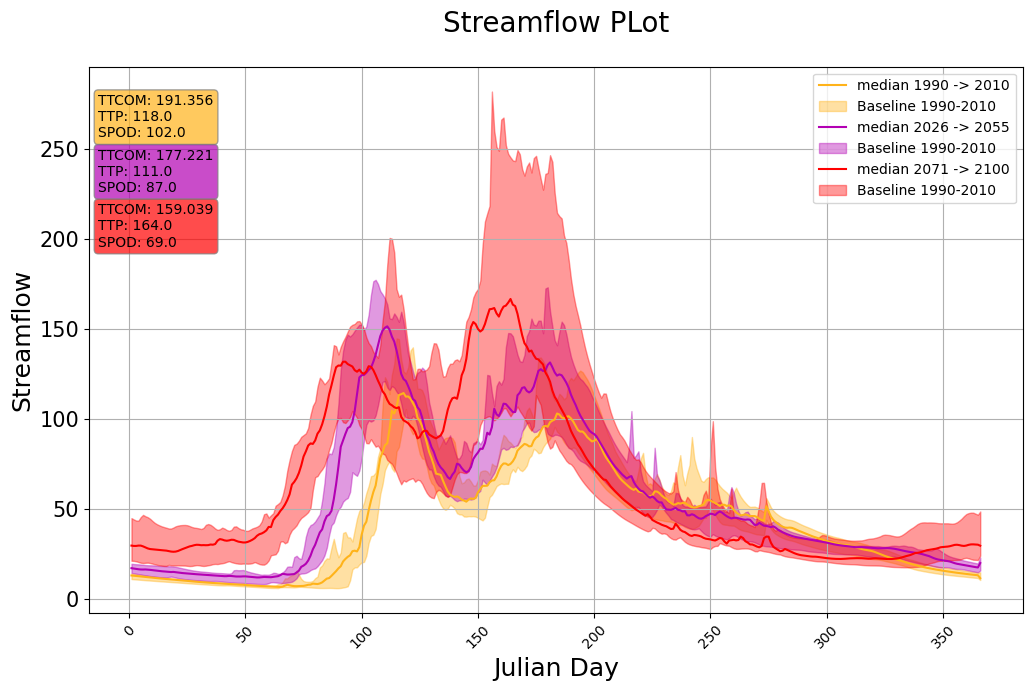

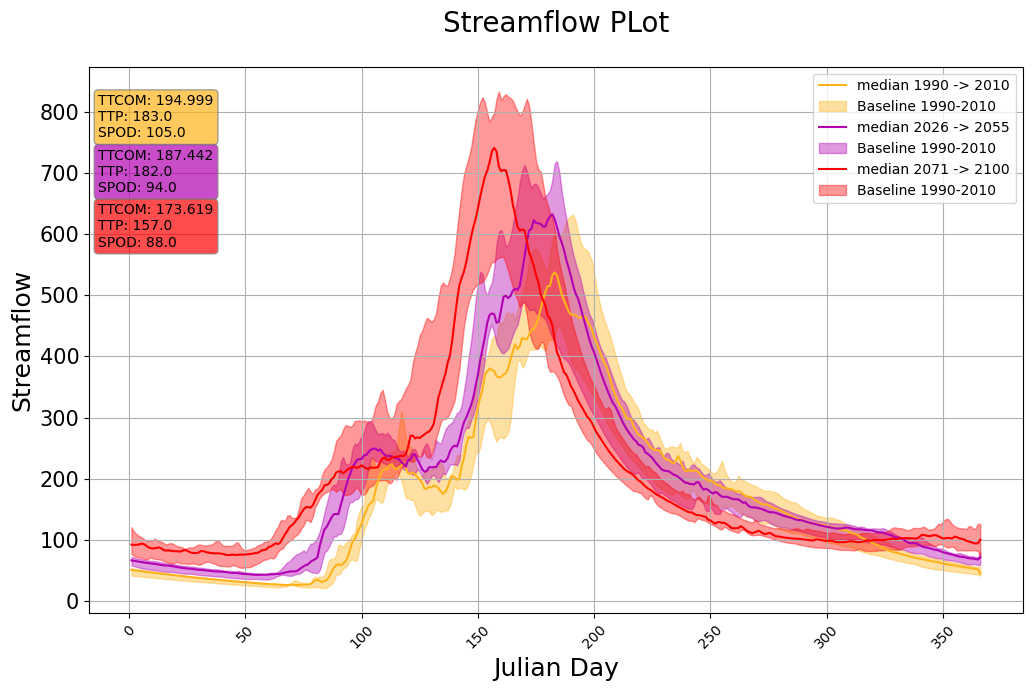

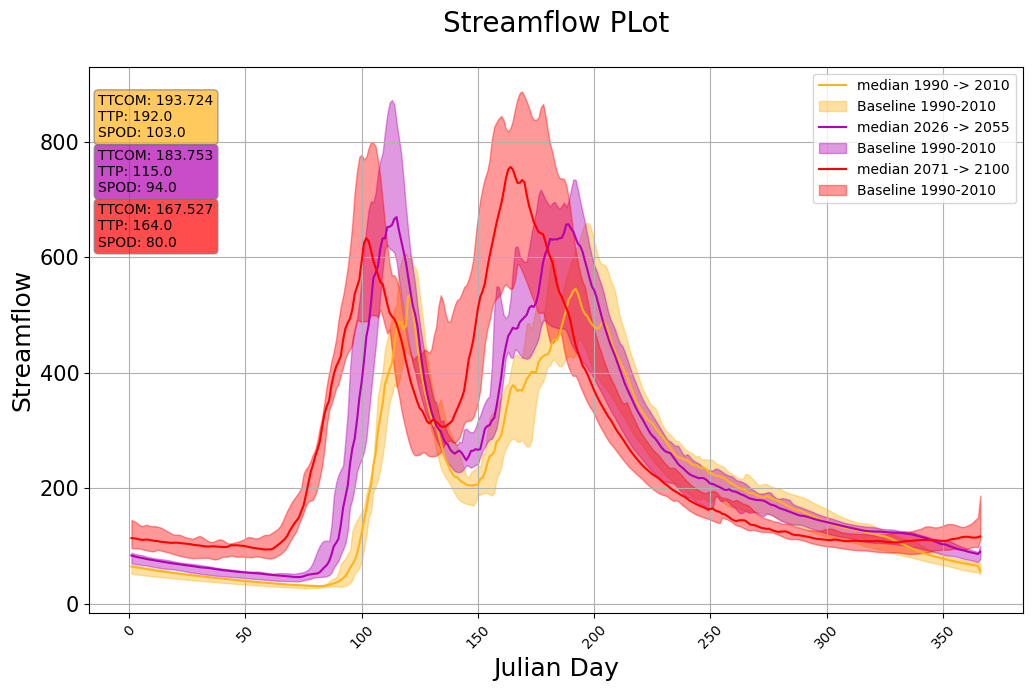

In [8]:
# Plain, simple and not a lot of Customizations. Lets change that.
# Lets add color, titles, labels, legends and display a few metrics

visuals.bounded_plot(
    lines = lines_to_plot, 
    upper_bounds = ubounds_list,
    lower_bounds = lbounds_list,
    linestyles=['(1.00, 0.70, 0.10)-', '(0.70, 0.00, 0.70)-', '(1.00, 0.00, 0.00)-'],
    labels=['Julian Day', 'Streamflow'],
    legend = ["median 1990 -> 2010", "median 2026 -> 2055", "median 2071 -> 2100"],
    bound_legend=["Baseline 1990-2010", "2026-2055", "2071-2100"],
    metrices= ["TTCOM", "TTP", "SPOD"],
    grid=True,
    transparency = [0.4],
    title = 'Streamflow PLot'
)

## Forecast Visualization

In [9]:
import json
from postprocessinglib.forecast import forecast

 The list of stations can be extraxted from the json file that contains the station information, including its latitude, longitude and its identification nummber amongst other things.

In [13]:
json_file = '../../../postprocessinglib/forecast/available_stations.json'
# Load the JSON file
with open(json_file, 'r') as f:
    dt = json.load(f)

# Extract station numbers
station = [feature['properties']['STATION_NUMBER'] for feature in dt['features']]

# Print or use the list
print(station)

['05AA024', '05AC003', '05AD007', '05AG006', '05AJ001', '05BB001', '05BG010', '05BH004', '05BL024', '05BN012', '05CA009', '05CB001', '05CC002', '05CE001', '05CK004', '05DB006', '05DC001', '05DF001', '05EF001', '05FA001', '05FE004', '05GG001', '05HD039', '05HG001', '05KD003', '05KJ001']


Using the MESH-Scripts_pylib LIbrary, we are able to obtain the real-time data from "https://api.weather.gc.ca/". This Library should already be installed in your conda environment if you followed the steps from the documentation page.

In [16]:
from datetime import datetime, timezone
from dateutil.relativedelta import relativedelta
from GeneralProcessing.gen_streamflow_file import GenStreamflowFile
gen_flow = GenStreamflowFile()


end_dt = datetime.now(timezone.utc).replace(microsecond=0) # Get the time today, right now as the end date.
start_dt = end_dt - relativedelta(months=1) # set the start date to a be a month into the past i.e., past 1 month data
start = start_dt.strftime("%Y-%m-%dT%H:%M:%SZ")
end   = end_dt.strftime("%Y-%m-%dT%H:%M:%SZ")
df_rt, meta_rt = gen_flow.fetch_hydrometric_realtime_full_range(
    # We will only br using the first 5 stations to allow for easy instant display of the graphs
    station_numbers=station, 
    start=start, end=end,
    window_days=1, freq_hours=12
)

Window 2025-06-16–2025-06-17 in 4.6s
Window 2025-06-17–2025-06-18 in 4.6s
Window 2025-06-18–2025-06-19 in 4.5s
Window 2025-06-19–2025-06-20 in 4.7s
Window 2025-06-20–2025-06-21 in 4.6s
Window 2025-06-21–2025-06-22 in 4.6s
Window 2025-06-22–2025-06-23 in 4.7s
Window 2025-06-23–2025-06-24 in 4.7s
Window 2025-06-24–2025-06-25 in 4.8s
Window 2025-06-25–2025-06-26 in 4.7s
Window 2025-06-26–2025-06-27 in 4.7s
Window 2025-06-27–2025-06-28 in 4.6s
Window 2025-06-28–2025-06-29 in 4.6s
Window 2025-06-29–2025-06-30 in 4.6s
Window 2025-06-30–2025-07-01 in 4.6s
Window 2025-07-01–2025-07-02 in 4.6s
Window 2025-07-02–2025-07-03 in 4.6s
Window 2025-07-03–2025-07-04 in 4.6s
Window 2025-07-04–2025-07-05 in 4.7s
Window 2025-07-05–2025-07-06 in 4.7s
Window 2025-07-06–2025-07-07 in 4.7s
Window 2025-07-07–2025-07-08 in 4.6s
Window 2025-07-08–2025-07-09 in 4.7s
Window 2025-07-09–2025-07-10 in 4.6s
Window 2025-07-10–2025-07-11 in 5.0s
Window 2025-07-11–2025-07-12 in 4.7s
Window 2025-07-12–2025-07-13 in 4.6s
W

C:\Users\udenzeU\AppData\Local\anaconda3\envs\postprocessing\Lib\site-packages\GeneralProcessing\gen_streamflow_file.py:420: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .resample(f"{freq_hours}H")
C:\Users\udenzeU\AppData\Local\anaconda3\envs\postprocessing\Lib\site-packages\GeneralProcessing\gen_streamflow_file.py:420: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .resample(f"{freq_hours}H")
C:\Users\udenzeU\AppData\Local\anaconda3\envs\postprocessing\Lib\site-packages\GeneralProcessing\gen_streamflow_file.py:420: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .resample(f"{freq_hours}H")
C:\Users\udenzeU\AppData\Local\anaconda3\envs\postprocessing\Lib\site-packages\GeneralProcessing\gen_streamflow_file.py:420: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .resample(f"{fre

In [17]:
df_rt

,05AA024,05AC003,05AD007,05AG006,05AJ001,05BB001,05BG010,05BH004,05BL024,05BN012,...,05DC001,05DF001,05EF001,05FA001,05FE004,05GG001,05HD039,05HG001,05KD003,05KJ001
DateTime,,,,,,,,,,,,,,,,,,,,,
2025-06-16 12:00:00+00:00,61.162963,2.658333,27.050000,27.290741,82.305556,104.018519,1.757778,180.000000,12.696296,41.953704,...,147.740741,200.462963,174.925926,0.713611,NaN,196.254902,0.670704,77.461111,381.462963,451.476190
2025-06-17 00:00:00+00:00,61.213194,2.749583,26.490972,25.831944,100.470833,99.618056,1.797500,180.006944,11.930556,59.325694,...,141.284722,166.541667,221.363636,0.685972,NaN,191.993056,0.639028,75.981250,260.194444,448.214286
2025-06-17 12:00:00+00:00,61.375000,2.697708,25.897222,27.598611,91.118056,98.112500,1.835764,175.527778,11.459722,62.867361,...,167.048611,201.805556,249.105263,0.496375,NaN,185.222222,0.670222,74.232639,304.375000,441.236111
2025-06-18 00:00:00+00:00,61.164583,2.630208,24.080556,26.704861,74.856944,94.234028,1.862222,166.548611,11.203472,67.351389,...,134.215278,244.027778,209.916667,0.694910,NaN,179.527778,0.778312,78.643056,232.076389,434.805556
2025-06-18 12:00:00+00:00,54.654167,2.871250,23.520833,27.892361,85.886806,92.716667,1.877153,162.840278,10.729167,60.918056,...,148.805556,223.722222,176.319444,0.438132,2.562059,184.437500,0.806007,74.471528,261.939394,431.722222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-14 12:00:00+00:00,60.150694,6.176736,27.192361,27.205556,46.396528,78.208333,5.187986,170.263889,20.741667,15.882639,...,101.392361,253.479167,211.222222,0.313389,2.828571,207.034722,0.832507,78.081250,359.881944,404.062500
2025-07-15 00:00:00+00:00,56.346528,5.850069,38.972917,28.222222,44.061806,84.968056,7.363194,173.722222,24.435417,17.679861,...,118.756944,236.951389,191.868056,0.267326,1.283611,204.298611,0.863757,84.411111,287.000000,409.465278
2025-07-15 12:00:00+00:00,49.093750,2.851597,39.009722,31.093750,42.345833,86.554167,8.537986,184.201389,43.906250,22.302778,...,142.576389,239.097222,181.798611,0.242097,1.250347,201.506944,0.903076,76.628472,288.131944,416.277778


From the forecast library, obtain the predicted data for the next 7 days as available from "https://geo.weather.gc.ca"

In [20]:
layer_name = 'DHPS_1km_RiverDischarge'
sim_rt = forecast.main(
    auth_path='../../../postprocessinglib/config.cfg',
    stn_list=station,
    layer_name=layer_name, 
    stn_locs_file=json_file
)

INFO:postprocessinglib.forecast.forecast:Finished forecast queries for station: 05AA024; iteration: 0
INFO:postprocessinglib.forecast.forecast:Finished forecast queries for station: 05AC003; iteration: 1
INFO:postprocessinglib.forecast.forecast:Finished forecast queries for station: 05AD007; iteration: 2
INFO:postprocessinglib.forecast.forecast:Finished forecast queries for station: 05AG006; iteration: 3
INFO:postprocessinglib.forecast.forecast:Finished forecast queries for station: 05AJ001; iteration: 4
INFO:postprocessinglib.forecast.forecast:Finished forecast queries for station: 05BB001; iteration: 5
INFO:postprocessinglib.forecast.forecast:Finished forecast queries for station: 05BG010; iteration: 6
INFO:postprocessinglib.forecast.forecast:Finished forecast queries for station: 05BH004; iteration: 7
INFO:postprocessinglib.forecast.forecast:Finished forecast queries for station: 05BL024; iteration: 8
INFO:postprocessinglib.forecast.forecast:Finished forecast queries for station: 05

In [21]:
sim_rt

,05AA024_sim,05AC003_sim,05AD007_sim,05AG006_sim,05AJ001_sim,05BB001_sim,05BG010_sim,05BH004_sim,05BL024_sim,05BN012_sim,...,05DC001_sim,05DF001_sim,05EF001_sim,05FA001_sim,05FE004_sim,05GG001_sim,05HD039_sim,05HG001_sim,05KD003_sim,05KJ001_sim
time,,,,,,,,,,,,,,,,,,,,,
2025-07-16 13:00:00,46.515423,1.479277,38.865707,34.152977,44.306267,78.746246,6.142348,165.029526,55.113937,64.550308,...,134.967285,302.506073,182.918060,0.280253,1.229524,196.321777,1.169870,71.654694,73.849007,412.939758
2025-07-16 14:00:00,37.042477,1.483850,42.202255,33.621796,43.168011,78.500984,6.137682,162.392807,57.625050,66.679565,...,140.195877,300.464478,189.141922,0.305292,1.236991,195.308990,1.060695,71.366203,137.949326,421.956177
2025-07-16 15:00:00,33.412296,1.487784,43.524441,33.568298,42.600117,78.263069,6.136721,159.770233,58.065262,68.524567,...,142.217300,299.725067,193.494614,0.343260,1.244239,194.834625,1.049541,70.947372,167.079727,425.680725
2025-07-16 16:00:00,30.308563,1.490197,44.780869,33.536556,42.097401,78.032173,6.132545,157.357269,58.340904,70.336349,...,143.589722,299.091736,198.447128,0.390805,1.250744,194.364990,1.045684,70.450592,201.518036,429.276154
2025-07-16 17:00:00,27.912155,1.491525,45.977180,33.498676,41.603054,77.806892,6.126828,155.066910,58.444721,72.143661,...,144.716614,298.475403,203.906830,0.447969,1.256808,193.886337,1.041916,69.906433,236.923172,432.602234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-22 08:00:00,32.485146,2.368299,43.280079,75.178802,405.216827,72.264336,4.918378,145.332199,23.381561,369.866150,...,129.220673,250.771332,209.584824,3.196670,3.110860,156.264862,1.954990,86.364594,296.837738,422.345032
2025-07-22 09:00:00,32.497242,2.347402,43.156414,74.924309,406.977539,72.100159,4.889674,145.311035,23.035578,372.677002,...,129.652252,250.607498,212.311630,3.147960,3.113681,156.531403,1.945156,86.388992,296.559509,425.408356
2025-07-22 10:00:00,32.510311,2.326619,43.036865,74.635735,408.479584,71.946281,4.863056,145.365845,22.692917,375.503357,...,130.122299,250.386673,215.053574,3.100234,3.116683,156.817429,1.936732,86.425026,296.137207,428.198944


In [22]:
# convert the index to UTC to align with the real-time data that was requested
simcopy = sim_rt.copy()
simcopy.index = simcopy.index.tz_localize('UTC')
simcopy = simcopy.resample('12h').mean()
simcopy

,05AA024_sim,05AC003_sim,05AD007_sim,05AG006_sim,05AJ001_sim,05BB001_sim,05BG010_sim,05BH004_sim,05BL024_sim,05BN012_sim,...,05DC001_sim,05DF001_sim,05EF001_sim,05FA001_sim,05FE004_sim,05GG001_sim,05HD039_sim,05HG001_sim,05KD003_sim,05KJ001_sim
time,,,,,,,,,,,,,,,,,,,,,
2025-07-16 12:00:00+00:00,29.607422,1.495017,46.546078,33.498775,41.270515,77.608727,6.113015,152.386078,57.984829,73.956512,...,144.784836,297.648560,210.197250,0.544074,1.260152,193.442871,1.051505,69.215164,237.355652,432.546204
2025-07-17 00:00:00+00:00,25.205797,1.588025,54.126736,33.236156,36.758312,75.268921,7.414078,132.342728,58.526081,96.030357,...,150.552353,284.152527,248.620926,1.154781,1.297363,188.134415,1.063279,63.336319,318.190338,438.201385
2025-07-17 12:00:00+00:00,26.173899,1.672988,58.672634,34.193203,33.791290,75.503395,10.401988,149.367432,55.594803,119.714317,...,147.437958,264.934418,239.996658,1.299218,1.340178,183.024307,1.247797,59.966976,322.453247,453.192291
2025-07-18 00:00:00+00:00,27.058004,1.640521,62.727100,36.723736,34.431973,77.687859,8.802481,173.617874,50.755199,144.064499,...,145.225159,246.603806,229.138504,1.417826,1.425886,178.811142,1.583893,61.618504,322.844330,424.231171
2025-07-18 12:00:00+00:00,27.775826,1.524882,63.527676,43.983463,33.278759,81.801468,7.324734,194.762924,45.978420,182.739685,...,143.481369,236.840195,222.720535,1.633465,1.572525,175.298080,1.711285,60.301823,320.686279,426.690674
2025-07-19 00:00:00+00:00,28.581902,1.419501,57.154774,47.577255,30.638906,84.458138,6.601474,198.398697,43.499493,251.564743,...,140.457657,234.614243,216.245132,1.684965,1.881476,170.178665,1.585414,79.278740,317.484406,450.508636
2025-07-19 12:00:00+00:00,29.359838,1.438707,47.799061,50.856995,39.533077,84.121544,6.089240,188.744400,40.792648,315.384430,...,136.751083,268.458771,208.033279,2.811747,2.273841,162.762207,1.423093,87.003487,313.635040,454.706757
2025-07-20 00:00:00+00:00,30.151381,1.628266,43.248241,59.990311,99.808266,82.072426,5.946760,184.987808,36.106625,344.749847,...,133.289230,282.144135,196.561768,4.108999,2.533857,155.330215,1.333144,87.324921,309.702515,430.993256
2025-07-20 12:00:00+00:00,30.815859,1.931592,43.710720,67.019714,158.152298,79.259079,5.935274,164.195145,33.977940,346.445923,...,130.044464,269.509979,186.119675,4.555727,2.689662,150.355484,1.415011,88.750496,305.055389,419.007294


In [23]:
# merge the two dataframes in preparation for plotting
obs = df_rt.copy()

merged_cols = []

for col1, col2 in zip(obs.columns, simcopy.columns):
    merged_cols.append(obs[col1])
    merged_cols.append(simcopy[col2])
    
merged = pd.concat(merged_cols, axis=1)
merged

,05AA024,05AA024_sim,05AC003,05AC003_sim,05AD007,05AD007_sim,05AG006,05AG006_sim,05AJ001,05AJ001_sim,...,05GG001,05GG001_sim,05HD039,05HD039_sim,05HG001,05HG001_sim,05KD003,05KD003_sim,05KJ001,05KJ001_sim
2025-06-16 12:00:00+00:00,61.162963,NaN,2.658333,NaN,27.050000,NaN,27.290741,NaN,82.305556,NaN,...,196.254902,NaN,0.670704,NaN,77.461111,NaN,381.462963,NaN,451.476190,NaN
2025-06-17 00:00:00+00:00,61.213194,NaN,2.749583,NaN,26.490972,NaN,25.831944,NaN,100.470833,NaN,...,191.993056,NaN,0.639028,NaN,75.981250,NaN,260.194444,NaN,448.214286,NaN
2025-06-17 12:00:00+00:00,61.375000,NaN,2.697708,NaN,25.897222,NaN,27.598611,NaN,91.118056,NaN,...,185.222222,NaN,0.670222,NaN,74.232639,NaN,304.375000,NaN,441.236111,NaN
2025-06-18 00:00:00+00:00,61.164583,NaN,2.630208,NaN,24.080556,NaN,26.704861,NaN,74.856944,NaN,...,179.527778,NaN,0.778312,NaN,78.643056,NaN,232.076389,NaN,434.805556,NaN
2025-06-18 12:00:00+00:00,54.654167,NaN,2.871250,NaN,23.520833,NaN,27.892361,NaN,85.886806,NaN,...,184.437500,NaN,0.806007,NaN,74.471528,NaN,261.939394,NaN,431.722222,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-20 12:00:00+00:00,NaN,30.815859,NaN,1.931592,NaN,43.710720,NaN,67.019714,NaN,158.152298,...,NaN,150.355484,NaN,1.415011,NaN,88.750496,NaN,305.055389,NaN,419.007294
2025-07-21 00:00:00+00:00,NaN,31.425034,NaN,2.382698,NaN,45.750507,NaN,72.529999,NaN,225.642456,...,NaN,149.464890,NaN,1.783918,NaN,87.639549,NaN,303.221832,NaN,433.615204
2025-07-21 12:00:00+00:00,NaN,31.874640,NaN,2.570146,NaN,45.290680,NaN,76.017738,NaN,335.449677,...,NaN,152.132568,NaN,2.055295,NaN,86.576958,NaN,301.004181,NaN,401.411407
2025-07-22 00:00:00+00:00,NaN,32.292049,NaN,2.416279,NaN,43.621506,NaN,75.500114,NaN,397.733612,...,NaN,155.625885,NaN,1.984416,NaN,86.333313,NaN,296.805695,NaN,413.990814


In [24]:
# Change the column headers to Multi-indexed headers to match the rest of the library's Dataframes.
from collections import defaultdict

def set_multiindex_columns(df):
    station_counts = defaultdict(int)
    multi_cols = []

    for col in df.columns:
        station = col.split('_')[0]
        count = station_counts[station]

        if count == 0:
            label = 'QOMEAS'
        elif count == 1 and col.endswith('_sim'):
            label = 'QOSIM'
        else:
            label = f'QOSIM{count}'

        station_counts[station] += 1
        multi_cols.append((station, label))

    # Apply MultiIndex to the DataFrame columns
    df.columns = pd.MultiIndex.from_tuples(multi_cols)
    return df

merged = set_multiindex_columns(merged)
merged

05AA024              05AC003            \
                              QOMEAS      QOSIM    QOMEAS     QOSIM   
2025-06-16 12:00:00+00:00  61.162963        NaN  2.658333       NaN   
2025-06-17 00:00:00+00:00  61.213194        NaN  2.749583       NaN   
2025-06-17 12:00:00+00:00  61.375000        NaN  2.697708       NaN   
2025-06-18 00:00:00+00:00  61.164583        NaN  2.630208       NaN   
2025-06-18 12:00:00+00:00  54.654167        NaN  2.871250       NaN   
...                              ...        ...       ...       ...   
2025-07-20 12:00:00+00:00        NaN  30.815859       NaN  1.931592   
2025-07-21 00:00:00+00:00        NaN  31.425034       NaN  2.382698   
2025-07-21 12:00:00+00:00        NaN  31.874640       NaN  2.570146   
2025-07-22 00:00:00+00:00        NaN  32.292049       NaN  2.416279   
2025-07-22 12:00:00+00:00        NaN  32.531227       NaN  2.286629   

                             05AD007               05AG006             \
                              QOMEAS      QOSIM     QOMEAS      QOSIM   
2025-06-16 12:00:00+00:00  27.050000        NaN  27.290741        NaN   
2025-06-17 00:00:00+00:00  26.490972        NaN  25.831944        NaN   
2025-06-17 12:00:00+00:00  25.897222        NaN  27.598611        NaN   
2025-06-18 00:00:00+00:00  24.080556        NaN  26.704861        NaN   
2025-06-18 12:00:00+00:00  23.520833        NaN  27.892361        NaN   
...                              ...        ...        ...        ...   
2025-07-20 12:00:00+00:00        NaN  43.710720        NaN  67.019714   
2025-07-21 00:00:00+00:00        NaN  45.750507        NaN  72.529999   
2025-07-21 12:00:00+00:00        NaN  45.290680        NaN  76.017738   
2025-07-22 00:00:00+00:00        NaN  43.621506        NaN  75.500114   
2025-07-22 12:00:00+00:00        NaN  42.808311        NaN  73.960770   

                              05AJ001              ...     05GG001  \
                               QOMEAS       QOSIM  ...      QOMEAS   
2025-06-16 12:00:00+00:00   82.305556         NaN  ...  196.254902   
2025-06-17 00:00:00+00:00  100.470833         NaN  ...  191.993056   
2025-06-17 12:00:00+00:00   91.118056         NaN  ...  185.222222   
2025-06-18 00:00:00+00:00   74.856944         NaN  ...  179.527778   
2025-06-18 12:00:00+00:00   85.886806         NaN  ...  184.437500   
...                               ...         ...  ...         ...   
2025-07-20 12:00:00+00:00         NaN  158.152298  ...         NaN   
2025-07-21 00:00:00+00:00         NaN  225.642456  ...         NaN   
2025-07-21 12:00:00+00:00         NaN  335.449677  ...         NaN   
2025-07-22 00:00:00+00:00         NaN  397.733612  ...         NaN   
2025-07-22 12:00:00+00:00         NaN  410.833221  ...         NaN   

                                        05HD039              05HG001  \
                                QOSIM    QOMEAS     QOSIM     QOMEAS   
2025-06-16 12:00:00+00:00         NaN  0.670704       NaN  77.461111   
2025-06-17 00:00:00+00:00         NaN  0.639028       NaN  75.981250   
2025-06-17 12:00:00+00:00         NaN  0.670222       NaN  74.232639   
2025-06-18 00:00:00+00:00         NaN  0.778312       NaN  78.643056   
2025-06-18 12:00:00+00:00         NaN  0.806007       NaN  74.471528   
...                               ...       ...       ...        ...   
2025-07-20 12:00:00+00:00  150.355484       NaN  1.415011        NaN   
2025-07-21 00:00:00+00:00  149.464890       NaN  1.783918        NaN   
2025-07-21 12:00:00+00:00  152.132568       NaN  2.055295        NaN   
2025-07-22 00:00:00+00:00  155.625885       NaN  1.984416        NaN   
2025-07-22 12:00:00+00:00  157.482880       NaN  1.923395        NaN   

                                         05KD003                 05KJ001  \
                               QOSIM      QOMEAS       QOSIM      QOMEAS   
2025-06-16 12:00:00+00:00        NaN  381.462963         NaN  451.476190   
2025-06-17 00:00:00+00:00        NaN  260.194444         NaN  448.214286   
202

Number of simulated data columns: 1
Number of linewidths provided is less than the number of columns. Number of columns : 2. Number of linewidths provided is:  1. Defaulting to 1.5
Number of linestyles provided is less than the number of columns. Number of columns : 2. Number of linestyles provided is:  1. Defaulting to solid lines (-)


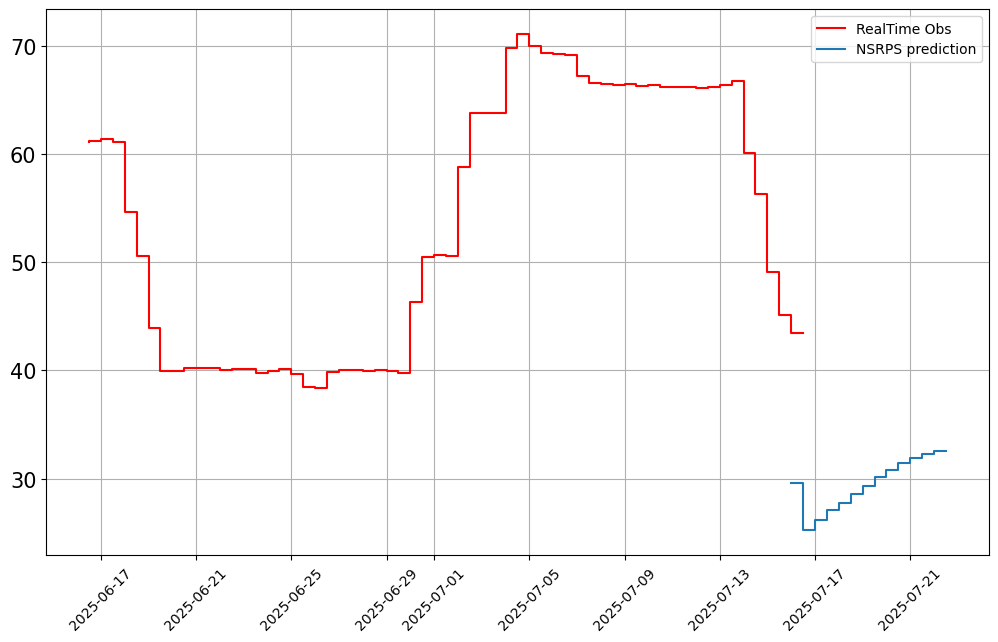

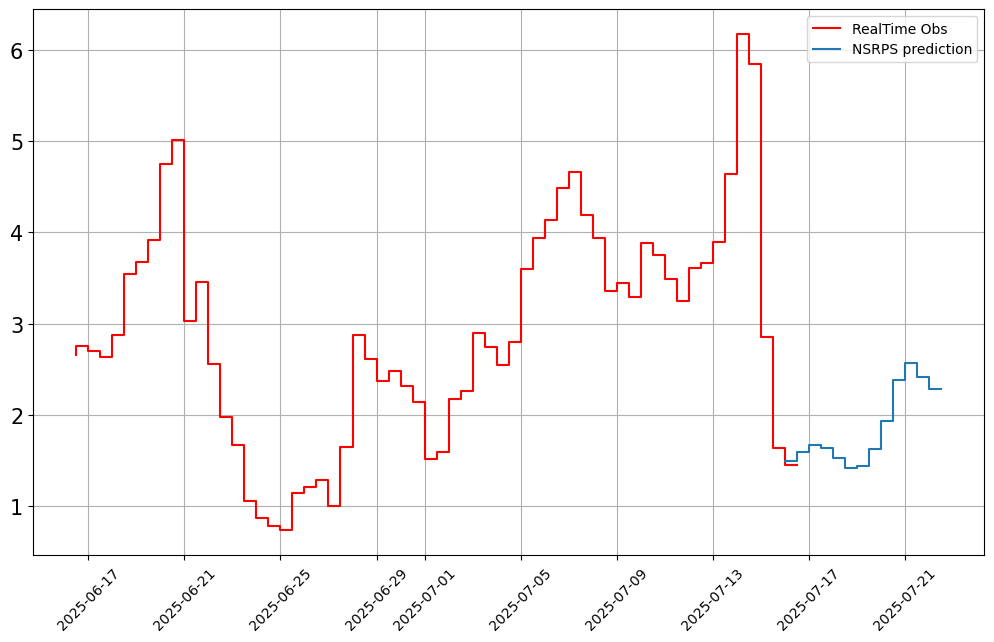

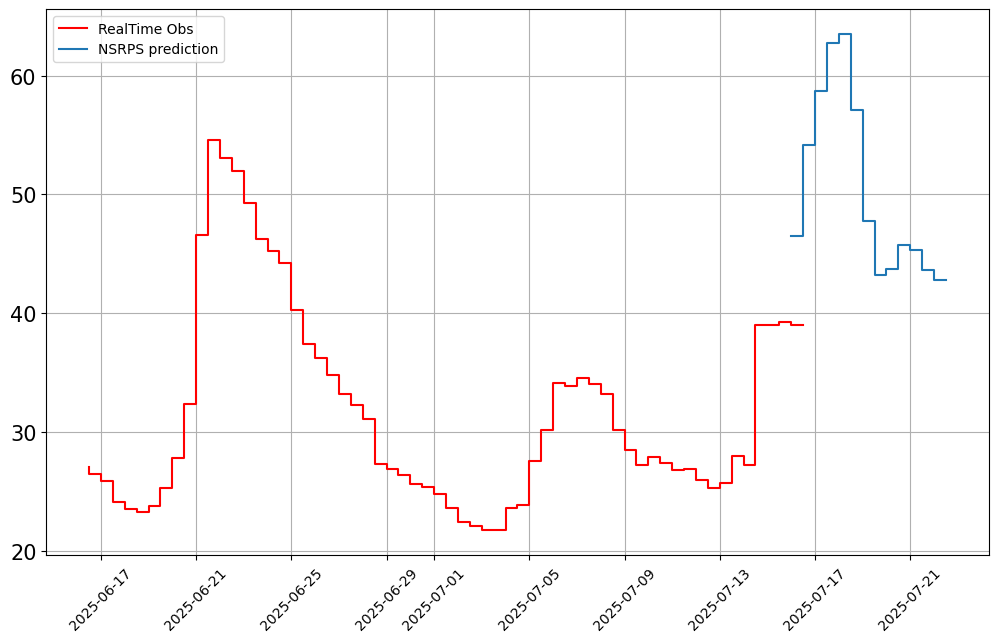

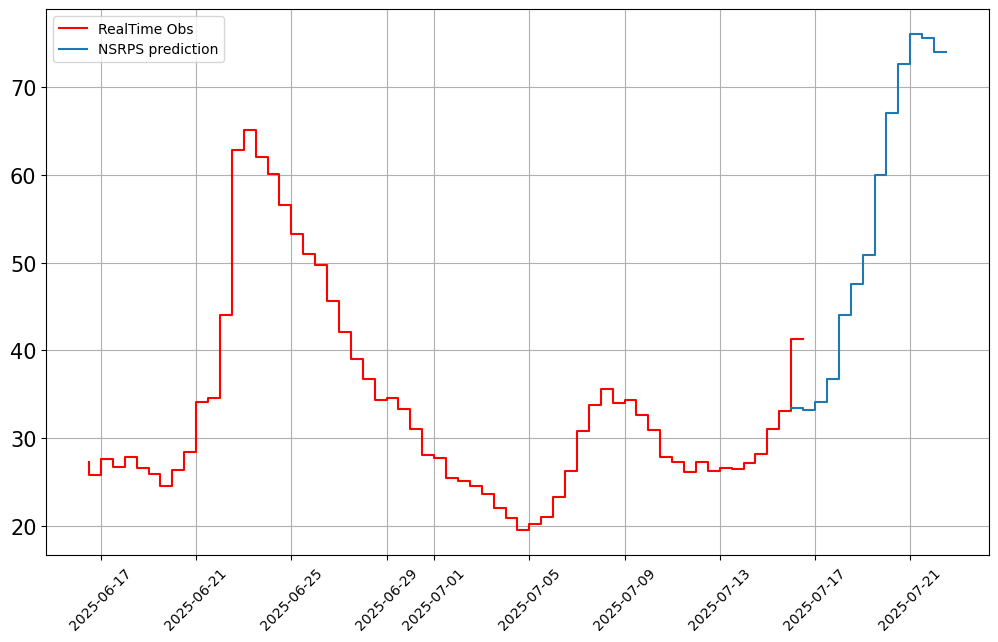

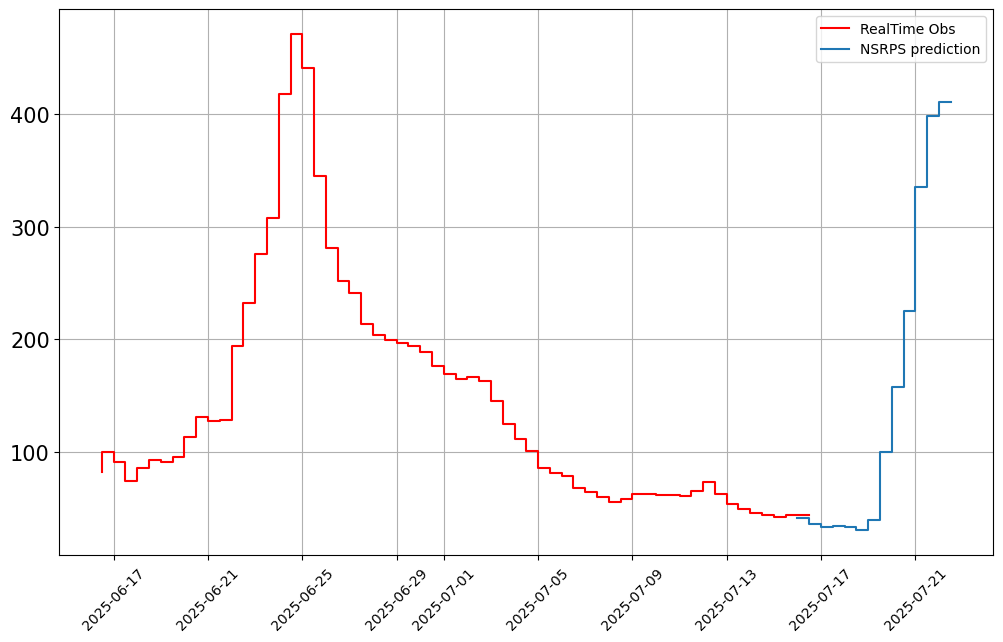

In [27]:
# Now we plot.
visuals.plot(merged_df = merged.iloc[:, :10], step = True, grid = True, legend = ["RealTime Obs", "NSRPS prediction"])

Number of simulated data columns: 1
Number of linewidths provided is less than the number of columns. Number of columns : 2. Number of linewidths provided is:  1. Defaulting to 1.5


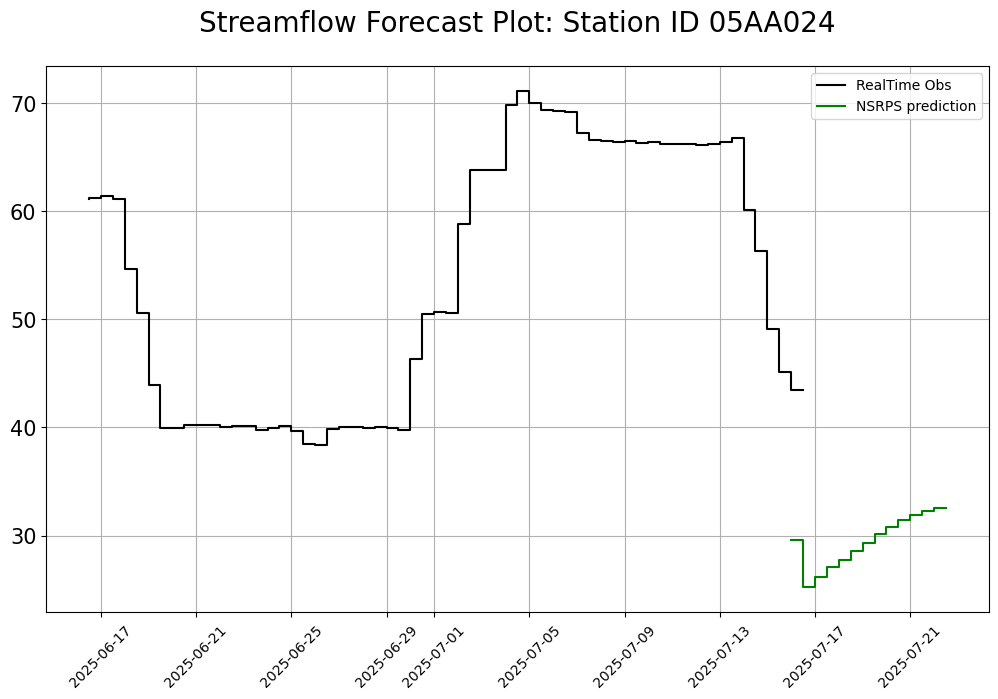

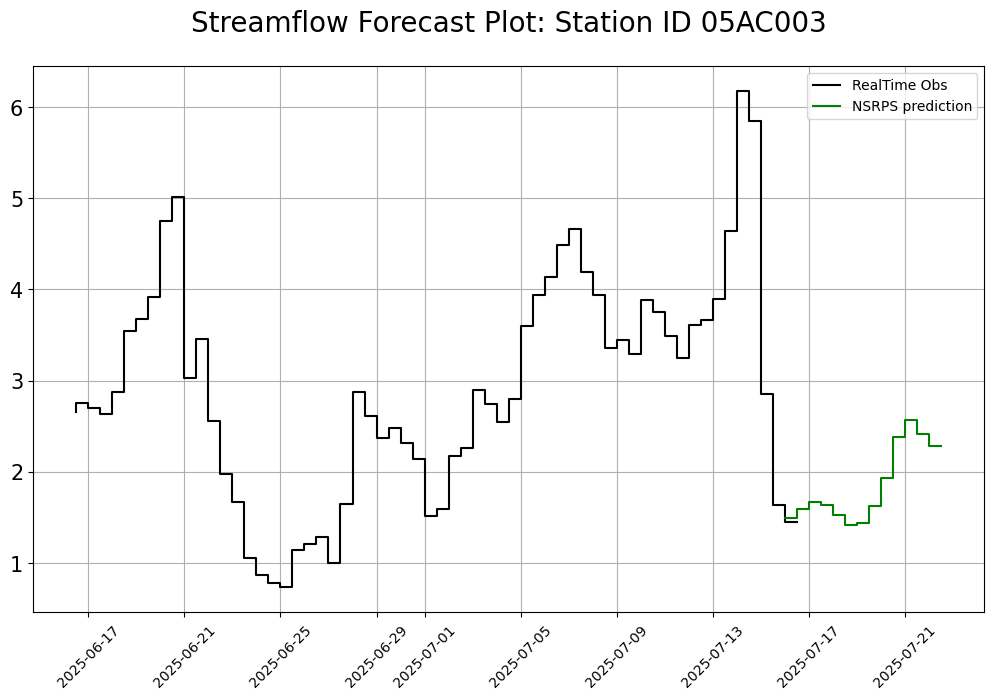

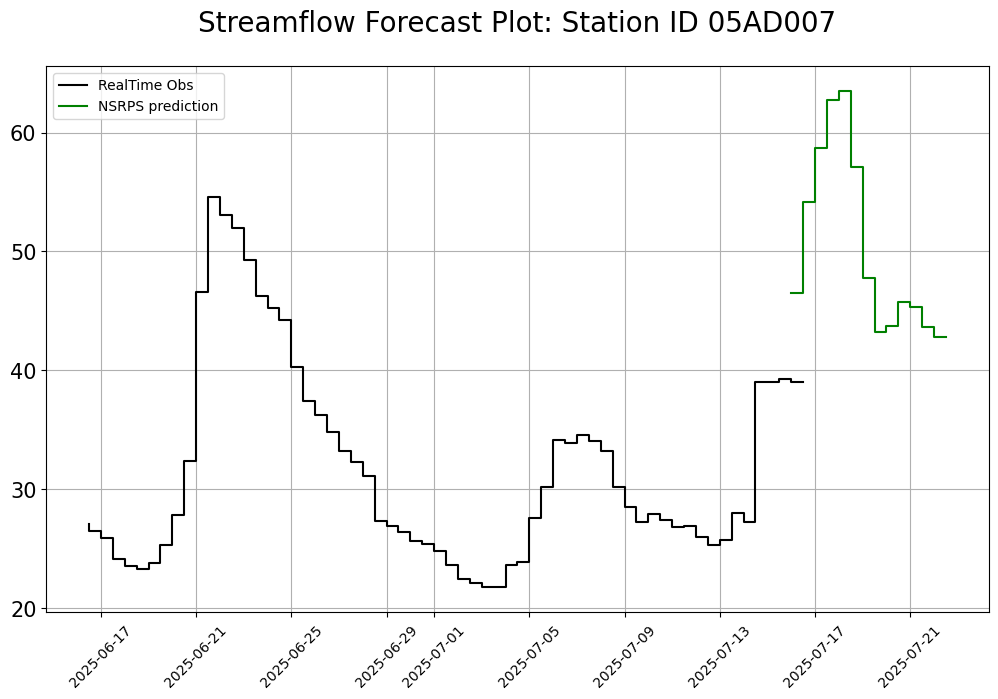

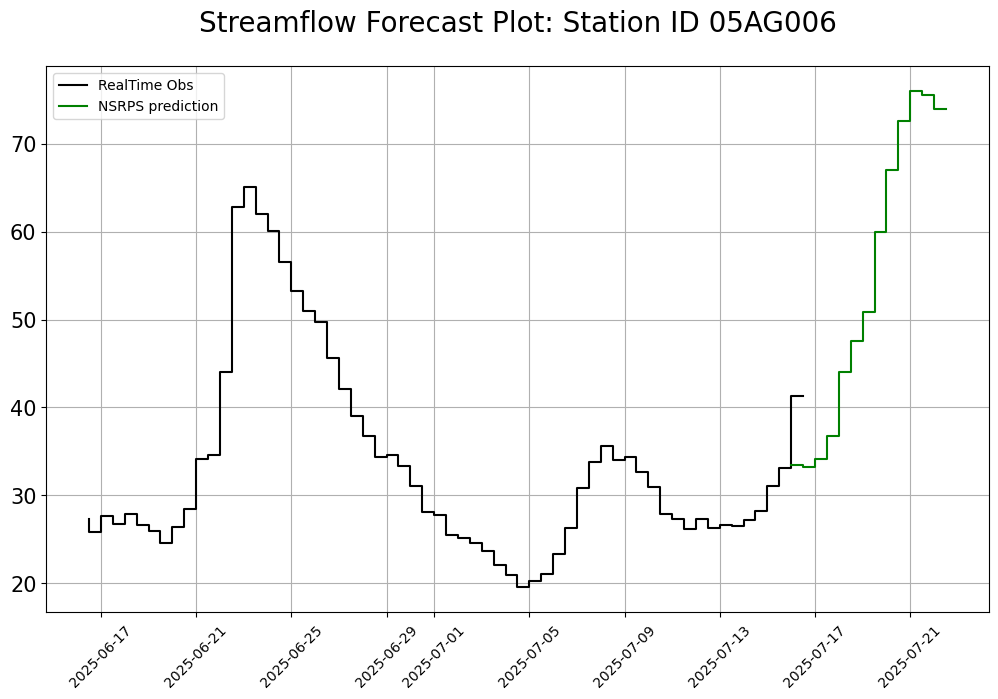

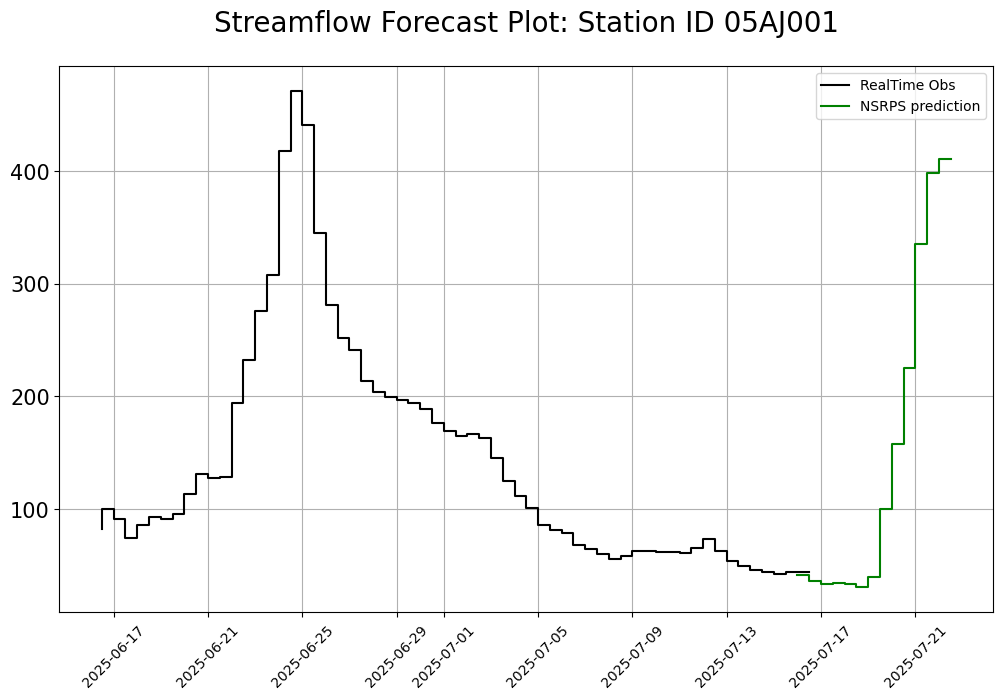

In [35]:
# Let us fill in the other plot features so that it looks exactly like we want.
visuals.plot(merged_df = merged.iloc[:, :10], step = True, grid = True, legend = ["RealTime Obs", "NSRPS prediction"],
             linestyles=['k-', 'g-'],
                 title = [f"Streamflow Forecast Plot: Station ID {i}" for i in station[:5]])

Let us now compare this data to the historical data for this time period over the last 45 years.

Again Using the MESH-Scrpts-Pylib library,

In [36]:
start_date = "1980-01-01"
end_date   = "2024-12-12"

station_ca = station
df_ca, meta_ca = gen_flow.fetch_hydrometric_data_ca(station_ca, start_date, end_date)
df_ca

Fetched daily‐mean for 05AA024 in 7.3s
Fetched daily‐mean for 05AC003 in 7.8s
Fetched daily‐mean for 05AD007 in 7.6s
Fetched daily‐mean for 05AG006 in 6.7s
Fetched daily‐mean for 05AJ001 in 7.9s
Fetched daily‐mean for 05BB001 in 7.5s
Fetched daily‐mean for 05BG010 in 6.0s
Fetched daily‐mean for 05BH004 in 7.5s
Fetched daily‐mean for 05BL024 in 7.6s
Fetched daily‐mean for 05BN012 in 7.6s
Fetched daily‐mean for 05CA009 in 7.8s
Fetched daily‐mean for 05CB001 in 7.6s
Fetched daily‐mean for 05CC002 in 7.8s
Fetched daily‐mean for 05CE001 in 7.8s
Fetched daily‐mean for 05CK004 in 7.5s
Fetched daily‐mean for 05DB006 in 7.5s
Fetched daily‐mean for 05DC001 in 4.0s
Fetched daily‐mean for 05DF001 in 7.6s
Fetched daily‐mean for 05EF001 in 7.9s
Fetched daily‐mean for 05FA001 in 7.8s
Fetched daily‐mean for 05FE004 in 7.6s
Fetched daily‐mean for 05GG001 in 7.5s
Fetched daily‐mean for 05HD039 in 7.5s
Fetched daily‐mean for 05HG001 in 7.0s
Fetched daily‐mean for 05KD003 in 7.6s
Fetched daily‐mean for 05

,05AA024,05AC003,05AD007,05AG006,05AJ001,05BB001,05BG010,05BH004,05BL024,05BN012,...,05DC001,05DF001,05EF001,05FA001,05FE004,05GG001,05HD039,05HG001,05KD003,05KJ001
Date,,,,,,,,,,,,,,,,,,,,,
1980-01-01,3.75,None,5.65,None,56.0,9.28,None,39.599998,1.75,35.0,...,None,72.300003,102.0,0.16,0.672,56.599998,0.53,164.0,158.0,309.0
1980-01-02,3.62,None,5.5,None,54.799999,9.53,None,39.599998,1.55,36.599998,...,None,62.900002,93.5,0.16,0.648,65.199997,0.53,170.0,227.0,297.0
1980-01-03,3.5,None,5.38,None,51.0,9.31,None,39.200001,1.4,38.0,...,None,67.900002,86.400002,0.16,0.624,83.400002,0.52,173.0,228.0,282.0
1980-01-04,3.4,None,5.22,None,48.099998,8.68,None,39.700001,1.22,39.5,...,None,69.699997,94.0,0.16,0.599,95.099998,0.51,165.0,164.0,263.0
1980-01-05,3.28,None,5.05,None,45.700001,7.79,None,39.700001,1.08,37.0,...,None,86.699997,92.199997,0.16,0.575,96.5,0.5,169.0,178.0,254.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-08,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,263.0,301.0
2024-12-09,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,242.0,316.0
2024-12-10,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,278.0,328.0


Using our Library, let us now find the seasonal long term aggregation of the data i.e., aggregate all the 45 years into 1 year.

In [39]:
# Make sure each value of the dataframe is in fact numeric
for i in station:
    df_ca[i] = pd.to_numeric(df_ca[i], errors='coerce')
    
lt_mean = data.long_term_seasonal(df=df_ca, method = 'mean')
lt_max = data.long_term_seasonal(df=df_ca, method = 'max')
lt_min = data.long_term_seasonal(df=df_ca, method = 'min')
lt_median = data.long_term_seasonal(df=df_ca , method = 'median')

lt_q95 = data.long_term_seasonal(df=df_ca , method = 'Q95')
lt_q5 = data.long_term_seasonal(df=df_ca , method = 'q5')
lt_q75 = data.long_term_seasonal(df=df_ca , method = 'Q75')
lt_q25 = data.long_term_seasonal(df=df_ca , method = 'q25')

In [44]:
print("lt_mean:\n",lt_mean)
print("lt_median:\n",lt_median)
print("lt_Q75:\n",lt_q75)
print("lt_Q5:\n",lt_q5)

lt_mean:
         05AA024   05AC003    05AD007    05AG006    05AJ001    05BB001  \
jday                                                                    
1      9.785349  0.840725  21.336136  22.416585  75.006818   9.638409   
2      9.753023  0.858775  20.686364  22.014878  75.288636   9.677045   
3      9.803721  0.853525  20.268409  22.131707  74.288636   9.704318   
4      9.835814  0.875600  20.170227  22.080976  72.884091   9.715909   
5      9.784884  0.842767  19.852954  21.791219  72.363637   9.725454   
...         ...       ...        ...        ...        ...        ...   
362   10.682558  0.814146  21.859546  23.195238  72.709091  10.025682   
363   10.858372  0.837707  22.240000  22.950000  75.097728   9.933409   
364   10.508372  0.855732  22.536136  22.960714  76.890909   9.865455   
365   10.226512  0.829707  22.306591  22.814524  76.252273   9.794545   
366   10.543636  0.780700  25.080909  18.361000  69.200000  10.389091   

       05BG010    05BH004   05BL024    0

Observe that the indexes of the aggregations are integers from 1-366 and the Real-Time and NSRPS have datetime index. We have to convert the jday indexes to UTC datetime and then extract that 37 day time frame before we can plot the data.


In [45]:
# To do this I prepared a function
def prepare_dataframes(short_term_df, long_term_df, upper_bounds_dfs, lower_bounds_dfs):
    """
    Prepare climatology DataFrames expanded to match timestamps of short_term_df,
    with separate lists of upper and lower bound DataFrames.

    Args:
      short_term_df: DataFrame with datetime index.
      long_term_df: DataFrame indexed by jday (1-366) for median or central tendency.
      upper_bounds_dfs: List of DataFrames indexed by jday (1-366) for upper bounds (e.g. q95, max, q75).
      lower_bounds_dfs: List of DataFrames indexed by jday (1-366) for lower bounds (e.g. q5, min, q25).

    Returns:
      expanded_climatology: DataFrame with same index as short_term_df (median/centerline)
      expanded_upper_bounds: List of DataFrames with same index as short_term_df (upper bounds)
      expanded_lower_bounds: List of DataFrames with same index as short_term_df (lower bounds)
    """
    import pandas as pd

    # Extract day of year (jday) for each timestamp in short_term_df
    jdays = short_term_df.index.dayofyear

    # Map median climatology values from jday to timestamps
    expanded_climatology = long_term_df.reindex(jdays).set_index(short_term_df.index)

    # Map each upper bound climatology similarly
    expanded_upper_bounds = []
    for upper_df in upper_bounds_dfs:
        expanded_upper = upper_df.reindex(jdays).set_index(short_term_df.index)
        expanded_upper_bounds.append(expanded_upper)

    # Map each lower bound climatology similarly
    expanded_lower_bounds = []
    for lower_df in lower_bounds_dfs:
        expanded_lower = lower_df.reindex(jdays).set_index(short_term_df.index)
        expanded_lower_bounds.append(expanded_lower)

    return expanded_climatology, expanded_upper_bounds, expanded_lower_bounds

In [46]:
median, upper, lower = prepare_dataframes(merged, lt_median, [lt_q95, lt_q75], [lt_q5, lt_q25])
# Recall - merged is the 37 day data that we are trying to compare to
# this should extract the corresponding 37 days with UTC datetime index.

In [47]:
print("median:\n",median)

median:
                              05AA024  05AC003     05AD007     05AG006  \
2025-06-16 12:00:00+00:00  95.000000    2.320  165.500000  150.500000   
2025-06-17 00:00:00+00:00  82.199997    2.500  149.000000  143.500000   
2025-06-17 12:00:00+00:00  82.199997    2.500  149.000000  143.500000   
2025-06-18 00:00:00+00:00  79.900002    2.420  141.000000  137.000000   
2025-06-18 12:00:00+00:00  79.900002    2.420  141.000000  137.000000   
...                              ...      ...         ...         ...   
2025-07-20 12:00:00+00:00  52.599998    2.595   45.700001   52.949999   
2025-07-21 00:00:00+00:00  50.200001    2.390   43.599998   49.200001   
2025-07-21 12:00:00+00:00  50.200001    2.390   43.599998   49.200001   
2025-07-22 00:00:00+00:00  48.599998    2.310   37.900000   50.700001   
2025-07-22 12:00:00+00:00  48.599998    2.310   37.900000   50.700001   

                           05AJ001     05BB001  05BG010  05BH004    05BL024  \
2025-06-16 12:00:00+00:00    417.5 

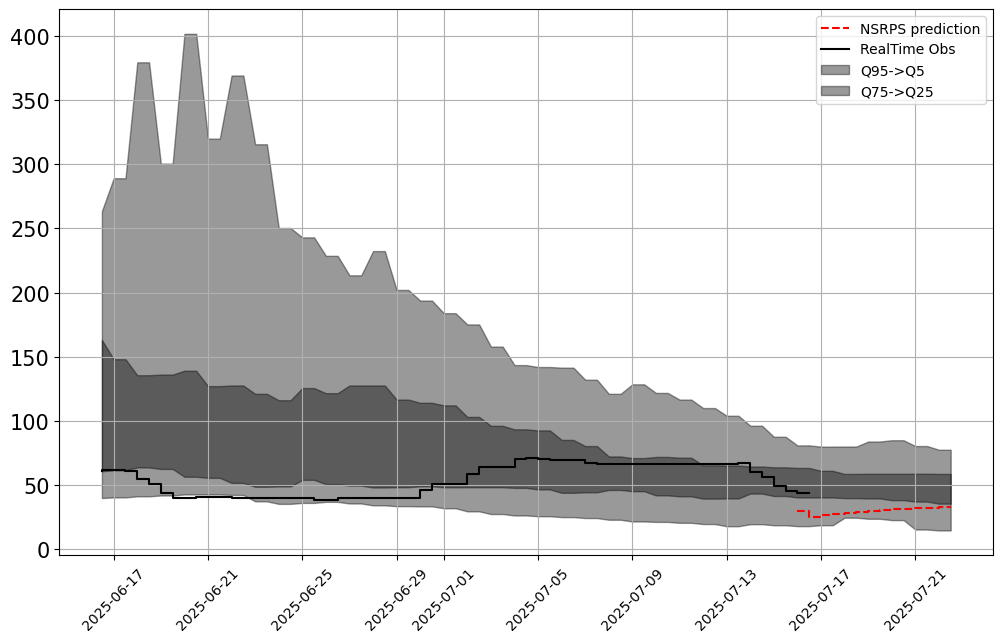

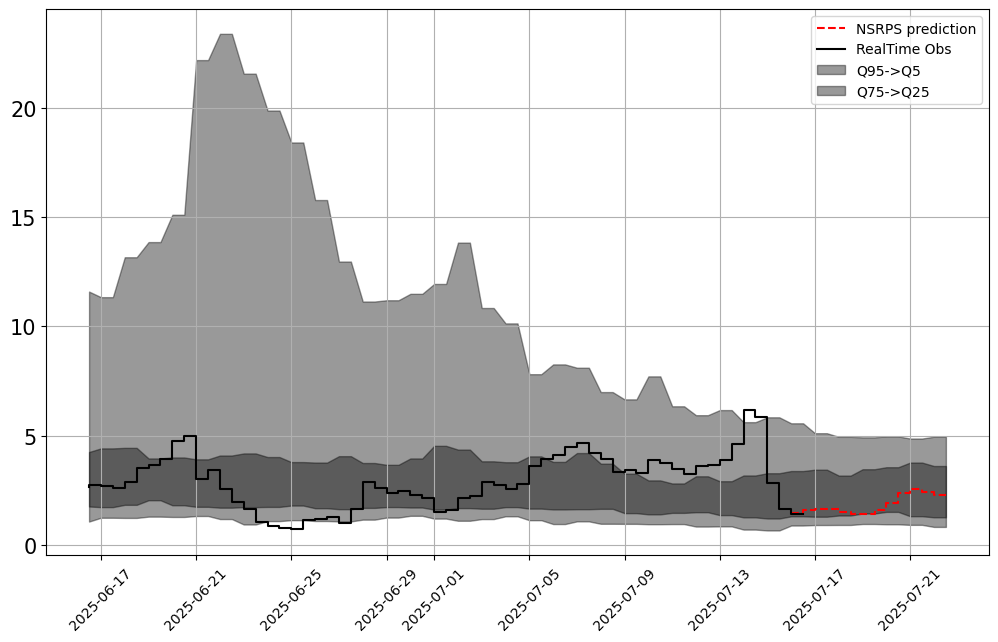

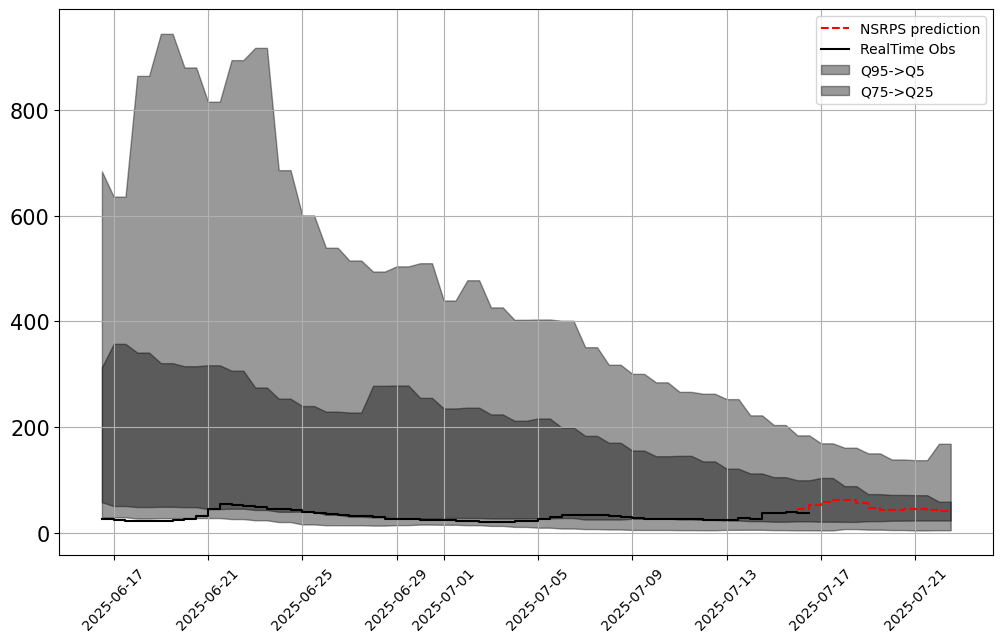

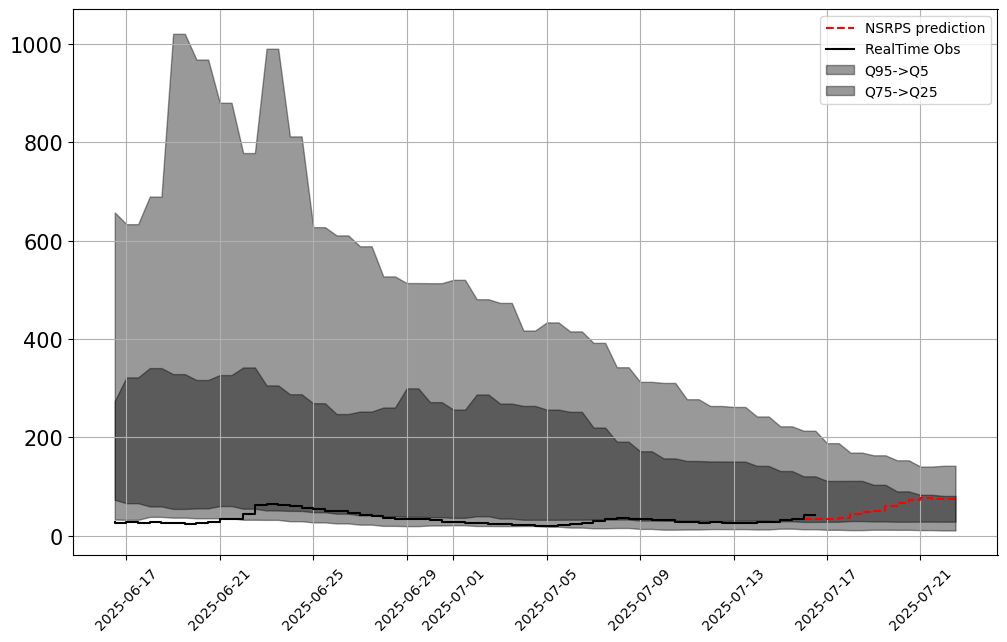

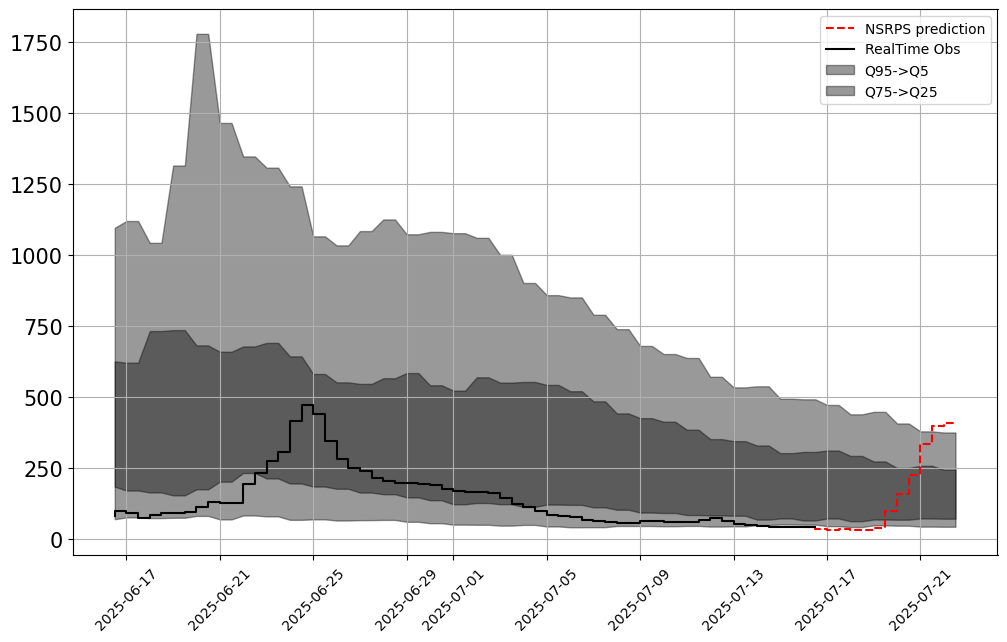

In [55]:
# Now we plot
visuals.bounded_plot(lines=merged.iloc[:, 0:10:2], upper_bounds=upper, lower_bounds=lower, extra_lines=merged.iloc[:, 1:10:2],
                     grid = True, step = True, legend = ["NSRPS prediction","RealTime Obs"], bound_legend= ["Q95->Q5","Q75->Q25"],
                     linestyles=["r-","k-"])